# Análise de Venda de Medicamentos Controlados e Antimicrobianos - Medicamentos Industrializados

Projeto de análise de vendas de medicamentos controlados e antimicrobianos exclusivamente industrializados na Região Metropolitana da Baixada Santista (RMBS) composta por nove municípios no litoral do estado de São Paulo, através de dados extraídos do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC) e disponibilizados no [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados) da Agência Nacional de Vigilância Sanitária (Anvisa). Através da análise das informações de vendas, dados geográricos, perfil de pacientes e características de medicamentos, aplicando a metodologia CRISP-DM, o objetivo é extrair insights de negócios, sugerir soluções aos problemas identificados e apresentar propostas de aprimoramento.

## Demanda do negócio

A análise dos dados possibilitará a obtenção de insigths, a identificação de tendências e a proposição de soluções estratégicas. Além disso, esse processo permitirá direcionar recursos de forma mais eficaz para áreas de maior demanda, aprimorando, assim, a gestão logística e o controle de estoque. Para atender a esses objetivos, foi definida as seguintes demandas de negócio:

- Compreender as tendências, padrões e características das vendas farmacêuticas.
- Construção de perfis de pacientes com base nos mendicamentos receitados.
- Compreender a demanda de medicamentos com base no perfil dos pacientes, por tempo e por município.
- Obter insights, identificar oportunidades e propor soluções a problemas.
- Elaboração de painel de informações de medicamentos baseado em filtros.

## Compreensão dos dados

Os dados que serão utilizados na análise compreendem o período de uma ano, outubro de 2020 até setembro de 2021, que integram um conjunto de doze arquivos em formato "CSV". Os dados foram extraídos do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC), provenientes apenas de farmácias e drogarias privadas que periodicamente devem enviar os dados a respeito de todas as vendas realizadas de medicamentos sujeitos à escrituração no SNGPC. Os dados foram disponibilizados no [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados) da Agência Nacional de Vigilância Sanitária (Anvisa).

## Tópicos da análise

- Construção de perfil de pacientes.
- Distribuição de pacientes por município.
- Demanda de medicamentos por paciente.
- Demanda de medicamentos por município.
- Demanda de medicamentos durante o ano.

## Dicionário de dados

**ANO_VENDA:** Ano da venda do medicamento.<br>
**MES_VENDA:** Mês da venda do medicamento.<br>
**UF_VENDA:** Unidade Federativa do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando a UF onde ocorreu a venda.<br>
**MUNICIPIO_VENDA:** Município do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando o Município onde ocorreu a venda.<br>
**PRINCIPIO_ATIVO:** Nome do princípio ativo do medicamento industrializado, conforme cadastrado no registro do medicamento, no banco de dados da Anvisa.<br>Quando um medicamento tem mais de um princípio ativo, cada um deles é separado pelo caractere “+”.<br>Ex.: “PRINCÍPIO ATIVO 1 + PRINCÍPIO ATIVO 2”<br>
**DESCRICAO_APRESENTACAO:** Uma Apresentação de Medicamento representa O modo como um medicamento é apresentado na embalagem. Exemplo: Medicamento X, pode ter duas apresentações diferentes:<br>• Apresentação 1:<br>Uma caixa com 1 blister de alumínio com 20 comprimidos, cada comprimido com 5 mg de princípio ativo.<br>Nesse caso, a descrição da apresentação seria:<br>“5 MG COM CT BL AL X 20”<br>• Apresentação 2:<br>Uma caixa com 1 frasco de vidro com 50 mL de um xarope, com concentração do princípio ativo de 15 mg por mL.<br>Nesse caso, a descrição da apresentação seria:<br>15MG/ML XPE CT FR VD x 50 ML<br>Esses exemplos representam descrições de apresentações diferentes para um mesmo medicamento.<br>Os termos utilizados na descrição das apresentações seguem o disposto no Vocabulário Controlado da Anvisa, disponível no link:<br>[http://portal.anvisa.gov.br/documents/33836/2501339/Vocabul%C3%A1rio+Controlado/fd8fdf08-45dc-402a-8dcf-fbb3fd21ca75](http://portal.anvisa.gov.br/documents/33836/2501339/Vocabul%C3%A1rio+Controlado/fd8fdf08-45dc-402a-8dcf-fbb3fd21ca75)<br>
**QTD_VENDIDA:** Quantidade vendida de caixas ou frascos do medicamento.<br>
**UNIDADE_MEDIDA:** Indica se a quantidade vendida do medicamento foi de caixas ou frascos.<br>
**CONSELHO_PRESCRITOR:** Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**UF_CONSELHO_PRESCRITOR:** Unidade Federativa do Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**TIPO_RECEITUARIO:** Tipo de receituário utilizado na prescrição.<br>Valores e respectivos tipos de receituário:<br>1 – Receita de Controle Especial em 2 vias (Receita Branca);<br>2 – Notificação de Receita B (Notificação Azul);<br>3 – Notificação de Receita Especial (Notificação Branca);<br>4 – Notificação de Receita A (Notificação Amarela);<br>5 – Receita Antimicrobiano em 2 vias.<br>
**CID10:** Classificação Internacional de Doença (aplicável apenas a medicamentos antimicrobianos).<br>
**SEXO:** Sexo do paciente (aplicável apenas a medicamentos antimicrobianos).<br>Valor 1 para o sexo masculino, valor 2 para o sexo feminino.<br>
**IDADE:** Valor numérico que representa a idade do paciente, em meses ou anos (aplicável apenas a medicamentos antimicrobianos).<br>
**UNIDADE_IDADE:** Unidade de medida da idade do paciente, que pode ser em meses ou anos (aplicável apenas a medicamentos antimicrobianos).<br>Valor 1 para unidade de medida em anos, valor 2 para unidade de medida em meses.<br>

## Sumário

---


## 1. Importação de bibliotecas


In [1]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import funcoes as fn

from tabulate import tabulate
from statistics import mode

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

## 2. Carregamento dos dados


In [2]:
# Efetuando a limpeza de memória antes do carregamento dos dados
gc.collect()

# Caminho do arquivo de dados
caminho = 'dados/ABT/00/'

# Criando um dataframe a partir dos arquivos no diretório de dados
df = pd.read_parquet(caminho, engine='pyarrow')

## 3. Análise do dataframe


In [262]:
# Informações do dataframe como nome das colunas, contagem de
# de dados, tipo de dados e quantidade de memória utilizada

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736196 entries, 0 to 736195
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ANO_VENDA               736196 non-null  int32   
 1   MES_VENDA               736196 non-null  int32   
 2   UF_VENDA                736196 non-null  object  
 3   MUNICIPIO_VENDA         736196 non-null  object  
 4   PRINCIPIO_ATIVO         735816 non-null  object  
 5   DESCRICAO_APRESENTACAO  736196 non-null  object  
 6   QTD_VENDIDA             736196 non-null  int32   
 7   UNIDADE_MEDIDA          736196 non-null  object  
 8   CONSELHO_PRESCRITOR     736196 non-null  object  
 9   UF_CONSELHO_PRESCRITOR  736196 non-null  object  
 10  TIPO_RECEITUARIO        736196 non-null  object  
 11  CID10                   49 non-null      object  
 12  SEXO                    615105 non-null  float64 
 13  IDADE                   615105 non-null  float64 
 14  UNID

In [263]:
print(f'\nQuantidade de linhas (registros):  {df.shape[0]}')
print(f'\nQuantidade de colunas (variáveis): {df.shape[1]}')


Quantidade de linhas (registros):  736196

Quantidade de colunas (variáveis): 17


In [264]:
# Agrupar os dados por ano/mês e exibir a quantidade de registros
df_ano_mes = df.groupby(['ANO_VENDA', 'MES_VENDA']).size()
df_ano_mes = pd.DataFrame(df_ano_mes)
df_ano_mes.rename(columns={0: 'QTDE'}, inplace=True)
df_ano_mes['%'] = df_ano_mes['QTDE']/df_ano_mes['QTDE'].sum()*100

df_ano_mes

QTDE         %
ANO_VENDA MES_VENDA                 
2020      10         61346  8.332835
          11         61844  8.400480
          12         63109  8.572310
2021      1          65856  8.945444
          2          59813  8.124603
          3          66270  9.001679
          4          56797  7.714929
          5          59675  8.105858
          6          59026  8.017702
          7          60118  8.166032
          8          60468  8.213574
          9          61874  8.404555

In [265]:
# Primeiras linhas do dataframe

df.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
0,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,69.0,1.0,2024-01-09,2020-10-01
1,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,73.0,1.0,2024-01-09,2020-10-01
2,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,78.0,1.0,2024-01-09,2020-10-01
3,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,2.0,18.0,1.0,2024-01-09,2020-10-01
4,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,2.0,38.0,1.0,2024-01-09,2020-10-01


In [266]:
# Últimas linhas do dataframe

df.tail()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
736191,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,6,FRASCO,CRMV,SP,5,None,NaN,NaN,NaN,2024-01-09,2021-09-01
736192,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,1,FRASCO,CRO,SP,5,None,2.0,35.0,1.0,2024-01-09,2021-09-01
736193,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,3,FRASCO,CRO,SP,5,None,2.0,45.0,1.0,2024-01-09,2021-09-01
736194,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,1,FRASCO,CRO,SP,5,None,2.0,91.0,1.0,2024-01-09,2021-09-01
736195,2021,9,SP,SANTOS,None,500 MG COM REV CT 2 BL AL PVDC LEIT X 7,1,CAIXA,CRM,SP,5,None,1.0,22.0,1.0,2024-01-09,2021-09-01


In [267]:
fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,ANO_VENDA,int32,0,0.00,2
1,MES_VENDA,int32,0,0.00,12
2,UF_VENDA,object,0,0.00,1
3,MUNICIPIO_VENDA,object,0,0.00,9
4,PRINCIPIO_ATIVO,object,380,0.05,293
5,DESCRICAO_APRESENTACAO,object,0,0.00,1915
6,QTD_VENDIDA,int32,0,0.00,757
7,UNIDADE_MEDIDA,object,0,0.00,2
8,CONSELHO_PRESCRITOR,object,0,0.00,4
9,UF_CONSELHO_PRESCRITOR,object,0,0.00,27


## 4. Limpeza e pré-processamento dos dados


### 4.1. Análise de registros duplicados


In [268]:
df.duplicated(keep='first').value_counts().to_frame().rename(
    columns={'count': 'Quantidade'})

,Quantidade
False,736196


### 4.2. Análise e tratamento de valores nulos


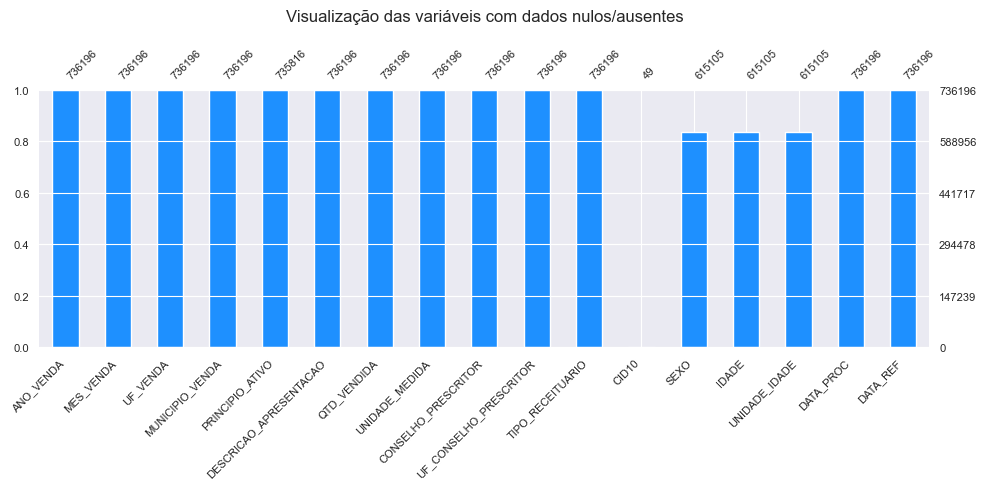

In [269]:
fn.grafico_bar_valores_nulos(df)

In [270]:
df_nulls = df[df[['PRINCIPIO_ATIVO']].isnull().any(axis=1)]
df_nulls = df_nulls.groupby(['DESCRICAO_APRESENTACAO']).size() \
    .reset_index(name='Quantidade')
df_nulls

,DESCRICAO_APRESENTACAO,Quantidade
0,10 MG COM REV CT BL AL/AL X 30,29
1,10 MG COM REV CT BL AL/AL X 60,13
2,2 MG COM CT 2 BL AL PLAS INC X 15,1
3,20 MG COM REV CT BL AL/AL X 30,5
4,250 MG COM REV CT 5 BL AL/AL X 2,1
5,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,183
6,"37,5 MG CAP GEL DURA LIB PROL CT BL PLAS OPC X 30",15
7,50 MG COM CX 2 BL AL PLAS INC X 15,5
8,500 MG CAP GEL DURA CT 2 BL AL PLAS INC X 4,8
9,500 MG COM REV CT 2 BL AL PVDC LEIT X 7,3


In [271]:
arr = np.unique(df_nulls['DESCRICAO_APRESENTACAO'])
for a in arr:
    try:
        df_t = df[df['DESCRICAO_APRESENTACAO'] == a]
        moda_principio_ativo = df_t['PRINCIPIO_ATIVO'].mode()[0]
        df.loc[(df['DESCRICAO_APRESENTACAO'] == a) &
               (df['PRINCIPIO_ATIVO'].isnull()), 'PRINCIPIO_ATIVO'] = moda_principio_ativo
    except:
        continue

df = df.dropna(subset=['PRINCIPIO_ATIVO'])
qtde_nulos = df['PRINCIPIO_ATIVO'].isnull().sum()
print(
    f'\nQuantidade de registros nulos na coluna PRINCIPIO_ATIVO: {qtde_nulos}')


Quantidade de registros nulos na coluna PRINCIPIO_ATIVO: 0


In [272]:
df = df.drop(columns='CID10')

In [273]:
df_nulls = df[df[['SEXO']].isnull().any(axis=1)]
df_nulls = df_nulls.groupby(['CONSELHO_PRESCRITOR']).size() \
    .reset_index(name='Quantidade')
df_nulls

,CONSELHO_PRESCRITOR,Quantidade
0,CRM,88796
1,CRMV,19748
2,CRO,9301
3,RMS,3207


In [274]:
df.loc[(df['CONSELHO_PRESCRITOR'] == 'CRMV')
       & (df['SEXO'].isnull()), 'SEXO'] = 3

moda_sexo = df['SEXO'].mode()[0]
df['SEXO'].fillna(moda_sexo, inplace=True)

qtde_nulos = df['SEXO'].isnull().sum()
print(f'\nQuantidade de registros nulos na coluna SEXO: {qtde_nulos}')


Quantidade de registros nulos na coluna SEXO: 0


In [275]:
df.loc[df['UNIDADE_IDADE'] == 2, 'IDADE'] /= 12

In [276]:
df_nulls = df[df[['IDADE']].isnull().any(axis=1)]
#df_nulls = df_nulls.groupby(['SEXO']).size() \
#    .reset_index(name='Quantidade')
df_nulls

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
7,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,2,CAIXA,CRMV,SP,5,3.0,NaN,NaN,2024-01-09,2020-10-01
11,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,FRASCO,CRMV,SP,1,3.0,NaN,NaN,2024-01-09,2020-10-01
47,2020,10,SP,MONGAGUÁ,ACETATO DE RETINOL + AMINOÁCIDOS + CLORANFENIC...,10.000 UI/G + 25 MG/G + 5 MG/G + 5 MG/G POM OF...,1,CAIXA,CRMV,SP,1,3.0,NaN,NaN,2024-01-09,2020-10-01
48,2020,10,SP,MONGAGUÁ,ACETATO DE RETINOL + AMINOÁCIDOS + CLORANFENIC...,10.000 UI/G + 25 MG/G + 5 MG/G + 5 MG/G POM OF...,2,CAIXA,CRMV,SP,5,3.0,NaN,NaN,2024-01-09,2020-10-01
49,2020,10,SP,MONGAGUÁ,ACETONIDA DE TRIANCINOLONA + GRAMICIDINA + NIS...,"1,0 MG/G + 2,5 MG/G +0,25 MG + 100000 UI/G POM...",2,CAIXA,CRMV,SP,5,3.0,NaN,NaN,2024-01-09,2020-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736180,2021,9,SP,SANTOS,ÁCIDO VALPRÓICO + VALPROATO DE SÓDIO,500 MG COM REV LIB PROL CT BL AL/AL X 30,20,CAIXA,CRM,SP,1,1.0,NaN,NaN,2024-01-09,2021-09-01
736181,2021,9,SP,SANTOS,ÁCIDO VALPRÓICO + VALPROATO DE SÓDIO,500 MG COM REV LIB PROL CT BL AL/AL X 30,3,CAIXA,CRO,SP,1,1.0,NaN,NaN,2024-01-09,2021-09-01
736182,2021,9,SP,SANTOS,ÁCIDO VALPRÓICO + VALPROATO DE SÓDIO,500 MG COM REV LIB PROL CT BL AL/AL X 60,11,CAIXA,CRM,SP,1,1.0,NaN,NaN,2024-01-09,2021-09-01
736183,2021,9,SP,SANTOS,CLORIDRATO DE DONEPEZILA,10 MG COM REV CT BL AL/AL X 30,7,CAIXA,CRM,SP,1,1.0,NaN,NaN,2024-01-09,2021-09-01


In [277]:
df.loc[df['SEXO'] == 3, 'IDADE'] = -1
media_idade = df['IDADE'].median()
df['IDADE'].fillna(media_idade, inplace=True)

qtde_nulos = df['IDADE'].isnull().sum()
print(f'\nQuantidade de registros nulos na coluna IDADE: {qtde_nulos}')


Quantidade de registros nulos na coluna IDADE: 0


In [278]:
df = df.drop(columns='UNIDADE_IDADE')

In [279]:

# teste=df.groupby(['PRINCIPIO_ATIVO','DESCRICAO_APRESENTACAO']).size() \
#        .reset_index(name='QTDE') \
#        .sort_values(by='QTDE', ascending=False)
# teste

In [7]:
dfx=df[['IDADE','UNIDADE_IDADE']]
teste=dfx.loc[dfx['UNIDADE_IDADE'] == 1.0]
teste.to_csv('teste.csv')

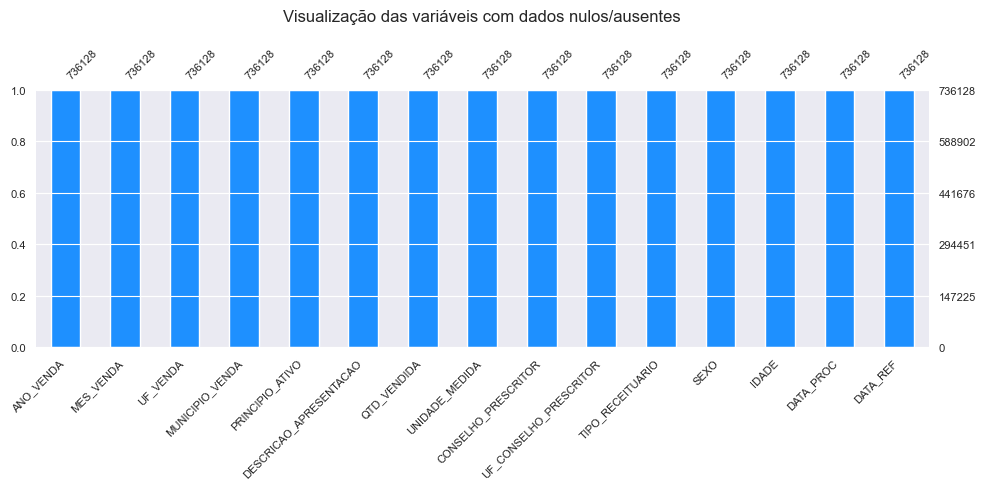

In [281]:
fn.grafico_bar_valores_nulos(df)

### 4.3. Análise de tipo dos dados

In [282]:
df.dtypes.to_frame().rename(columns={0: 'Tipo'})

,Tipo
ANO_VENDA,int32
MES_VENDA,int32
UF_VENDA,object
MUNICIPIO_VENDA,object
PRINCIPIO_ATIVO,object
DESCRICAO_APRESENTACAO,object
QTD_VENDIDA,int32
UNIDADE_MEDIDA,object
CONSELHO_PRESCRITOR,object
UF_CONSELHO_PRESCRITOR,object


In [283]:
df['ANO_VENDA'] = df['ANO_VENDA'].astype('int32')
df['MES_VENDA'] = df['MES_VENDA'].astype('int8')
df['SEXO'] = df['SEXO'].astype('int8')
df['IDADE'] = df['IDADE'].astype('int32')
df['TIPO_RECEITUARIO'] = df['TIPO_RECEITUARIO'].astype('int8')
df['DATA_PROC'] = pd.to_datetime(df['DATA_PROC'])

df['DATA_REF'] = df['DATA_REF'].str.strip()
df['DATA_REF'] = pd.to_datetime(df['DATA_REF'], format='%Y-%m-%d',errors='coerce')

In [284]:
df.dtypes.to_frame().rename(columns={0: 'Tipo'})

,Tipo
ANO_VENDA,int32
MES_VENDA,int8
UF_VENDA,object
MUNICIPIO_VENDA,object
PRINCIPIO_ATIVO,object
DESCRICAO_APRESENTACAO,object
QTD_VENDIDA,int32
UNIDADE_MEDIDA,object
CONSELHO_PRESCRITOR,object
UF_CONSELHO_PRESCRITOR,object


### 4.4. Análise da cardinalidade


In [285]:
cols = df.columns
qtde_unicos = 12

for col in cols:
    if df[col].nunique() <= qtde_unicos:
        data = pd.DataFrame(fn.exibe_valores_unicos(df[col]))
        display(data)

ANO_VENDA,2020,2021
Quantidade,186278,549850


MES_VENDA,1,2,3,4,5,6,7,8,9,10,11,12
Quantidade,65849,59809,66261,56793,59672,59024,60112,60464,61866,61342,61838,63098


UF_VENDA,SP
Quantidade,736128


MUNICIPIO_VENDA,BERTIOGA,CUBATÃO,GUARUJÁ,ITANHAÉM,MONGAGUÁ,PERUÍBE,PRAIA GRANDE,SANTOS,SÃO VICENTE
Quantidade,34642,41301,94772,42733,32739,44897,126250,214309,104485


UNIDADE_MEDIDA,CAIXA,FRASCO
Quantidade,651214,84914


CONSELHO_PRESCRITOR,CRM,CRMV,CRO,RMS
Quantidade,626285,19748,85618,4477


TIPO_RECEITUARIO,1,2,3,4,5
Quantidade,103093,14531,2353,2825,613326


SEXO,1,2,3
Quantidade,462612,253768,19748


DATA_PROC,2024-01-09
Quantidade,736128


DATA_REF,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01
Quantidade,61342,61838,63098,65849,59809,66261,56793,59672,59024,60112,60464,61866


In [286]:
fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,ANO_VENDA,int32,0,0.0,2
1,MES_VENDA,int8,0,0.0,12
2,UF_VENDA,object,0,0.0,1
3,MUNICIPIO_VENDA,object,0,0.0,9
4,PRINCIPIO_ATIVO,object,0,0.0,293
5,DESCRICAO_APRESENTACAO,object,0,0.0,1906
6,QTD_VENDIDA,int32,0,0.0,757
7,UNIDADE_MEDIDA,object,0,0.0,2
8,CONSELHO_PRESCRITOR,object,0,0.0,4
9,UF_CONSELHO_PRESCRITOR,object,0,0.0,27


## 5. Análise das medidas estatísticas dos dados


In [287]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ANO_VENDA,736128.0,2020.746949,2020.0,2020.0,2021.0,2021.0,2021.0,0.43476
MES_VENDA,736128.0,6.488043,1.0,3.0,7.0,10.0,12.0,3.490513
QTD_VENDIDA,736128.0,4.787557,1.0,1.0,1.0,2.0,32021.0,46.050546
TIPO_RECEITUARIO,736128.0,4.37036,1.0,5.0,5.0,5.0,5.0,1.427795
SEXO,736128.0,1.398387,1.0,1.0,1.0,2.0,3.0,0.541599
IDADE,736128.0,41.887945,-1.0,28.0,42.0,57.0,993.0,23.851687
DATA_PROC,736128,2024-01-09 00:00:00,2024-01-09 00:00:00,2024-01-09 00:00:00,2024-01-09 00:00:00,2024-01-09 00:00:00,2024-01-09 00:00:00,NaN
DATA_REF,736128,2021-03-15 18:37:25.305164544,2020-10-01 00:00:00,2020-12-01 00:00:00,2021-03-01 00:00:00,2021-06-01 00:00:00,2021-09-01 00:00:00,NaN


In [288]:
cols = df.select_dtypes(include=['object', 'category']).columns
df[cols].describe().T

,count,unique,top,freq
UF_VENDA,736128,1,SP,736128
MUNICIPIO_VENDA,736128,9,SANTOS,214309
PRINCIPIO_ATIVO,736128,293,AZITROMICINA DI-HIDRATADA,85240
DESCRICAO_APRESENTACAO,736128,1906,500 MG CAP DURA CT BL AL PLAS TRANS X 21,29660
UNIDADE_MEDIDA,736128,2,CAIXA,651214
CONSELHO_PRESCRITOR,736128,4,CRM,626285
UF_CONSELHO_PRESCRITOR,736128,27,SP,721745


### 5.1. Distribuição dos dados em gráfico boxplot


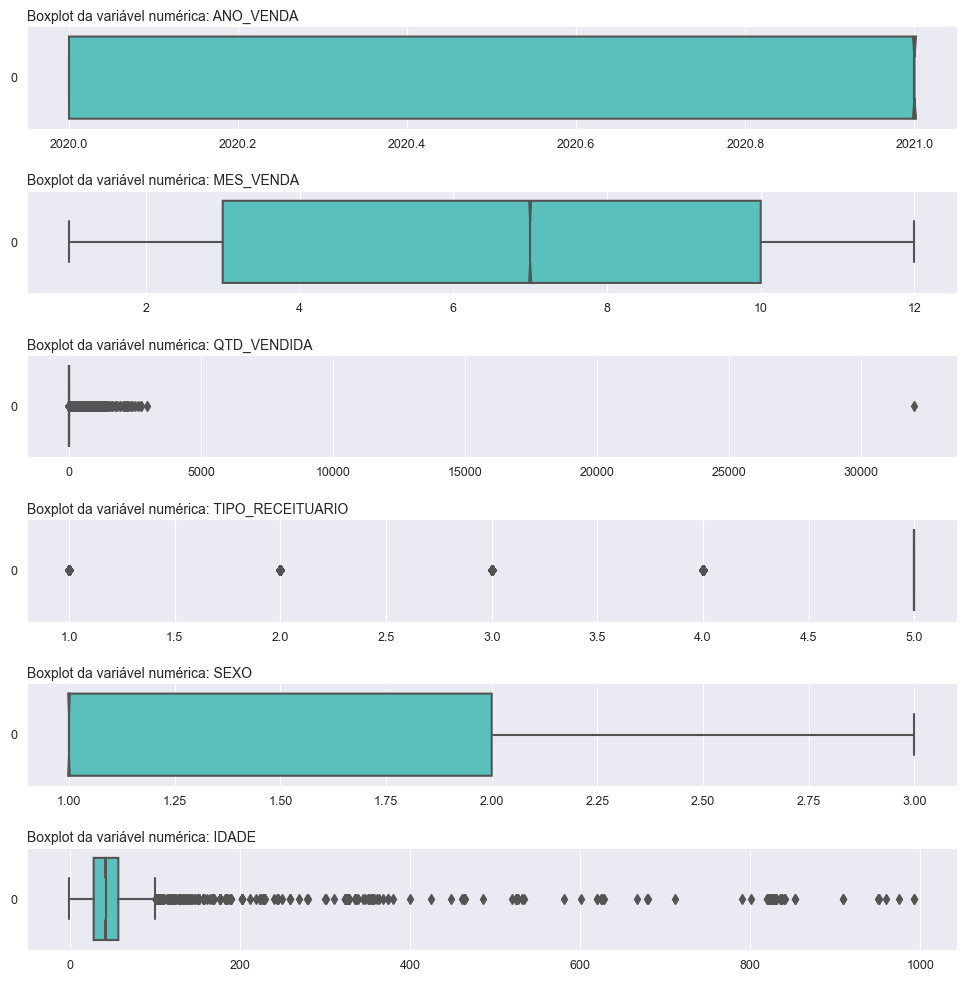

In [289]:
def graf_boxplot(dataframe):
    '''
    Plota vários boxplots de acordo com o número de colunas.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    '''
    # Selecionar apenas variáveis numéricas
    colunas = dataframe.select_dtypes(include=['number']).columns

    # Calcular a quantidade de subplots necessário
    qtde_subplots = len(colunas)

    # Criar subplots dinamicamente
    fig, axs = plt.subplots(qtde_subplots, 1,
                            figsize=(12, 2 * qtde_subplots), gridspec_kw={'hspace': 0.6})

    # Loop sobre as variáveis numéricas e plotar o gráfico
    for i, col in enumerate(colunas):
        sns.boxplot(data=dataframe[col], ax=axs[i],
                    notch=True, orient='h', color='mediumturquoise')
        # Configurar o título e remover os rótulos dos eixos
        axs[i].set_title(
            f'Boxplot da variável numérica: {col}', loc='left', fontsize=10, pad=4)
        axs[i].set(xlabel='', ylabel='')
        # Ajustar o tamanho dos rótulos
        axs[i].tick_params(labelsize=9)
        # Exibir rótulos sem formatação especial
        axs[i].ticklabel_format(style='plain', axis='x')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()


graf_boxplot(df)

### 5.2. Análise dos outliers identificados

In [290]:
# Geração dos limites inferior e superior das variáveis que apresentaram outliers

cols = ['QTD_VENDIDA', 'IDADE']

for col in cols:

    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ
    total_limite = ((len(df[(df[col] > (limite_superior))]) +
                    len(df[(df[col] < (limite_inferior))])) / df.shape[0])

    print(f'\n{col.upper()}')
    print(f'Intervalo interquartil: {IIQ}')
    print(f'Limite inferior: {limite_inferior}')
    print(f'Limite superior: {limite_superior}')
    print(f'Os outliers correspondem a {total_limite:.2%} dos dados da variável.')


QTD_VENDIDA
Intervalo interquartil: 1.0
Limite inferior: -0.5
Limite superior: 3.5
Os outliers correspondem a 17.40% dos dados da variável.

IDADE
Intervalo interquartil: 29.0
Limite inferior: -15.5
Limite superior: 100.5
Os outliers correspondem a 0.08% dos dados da variável.


### 5.3. Distribuição dos dados em gráfico histograma

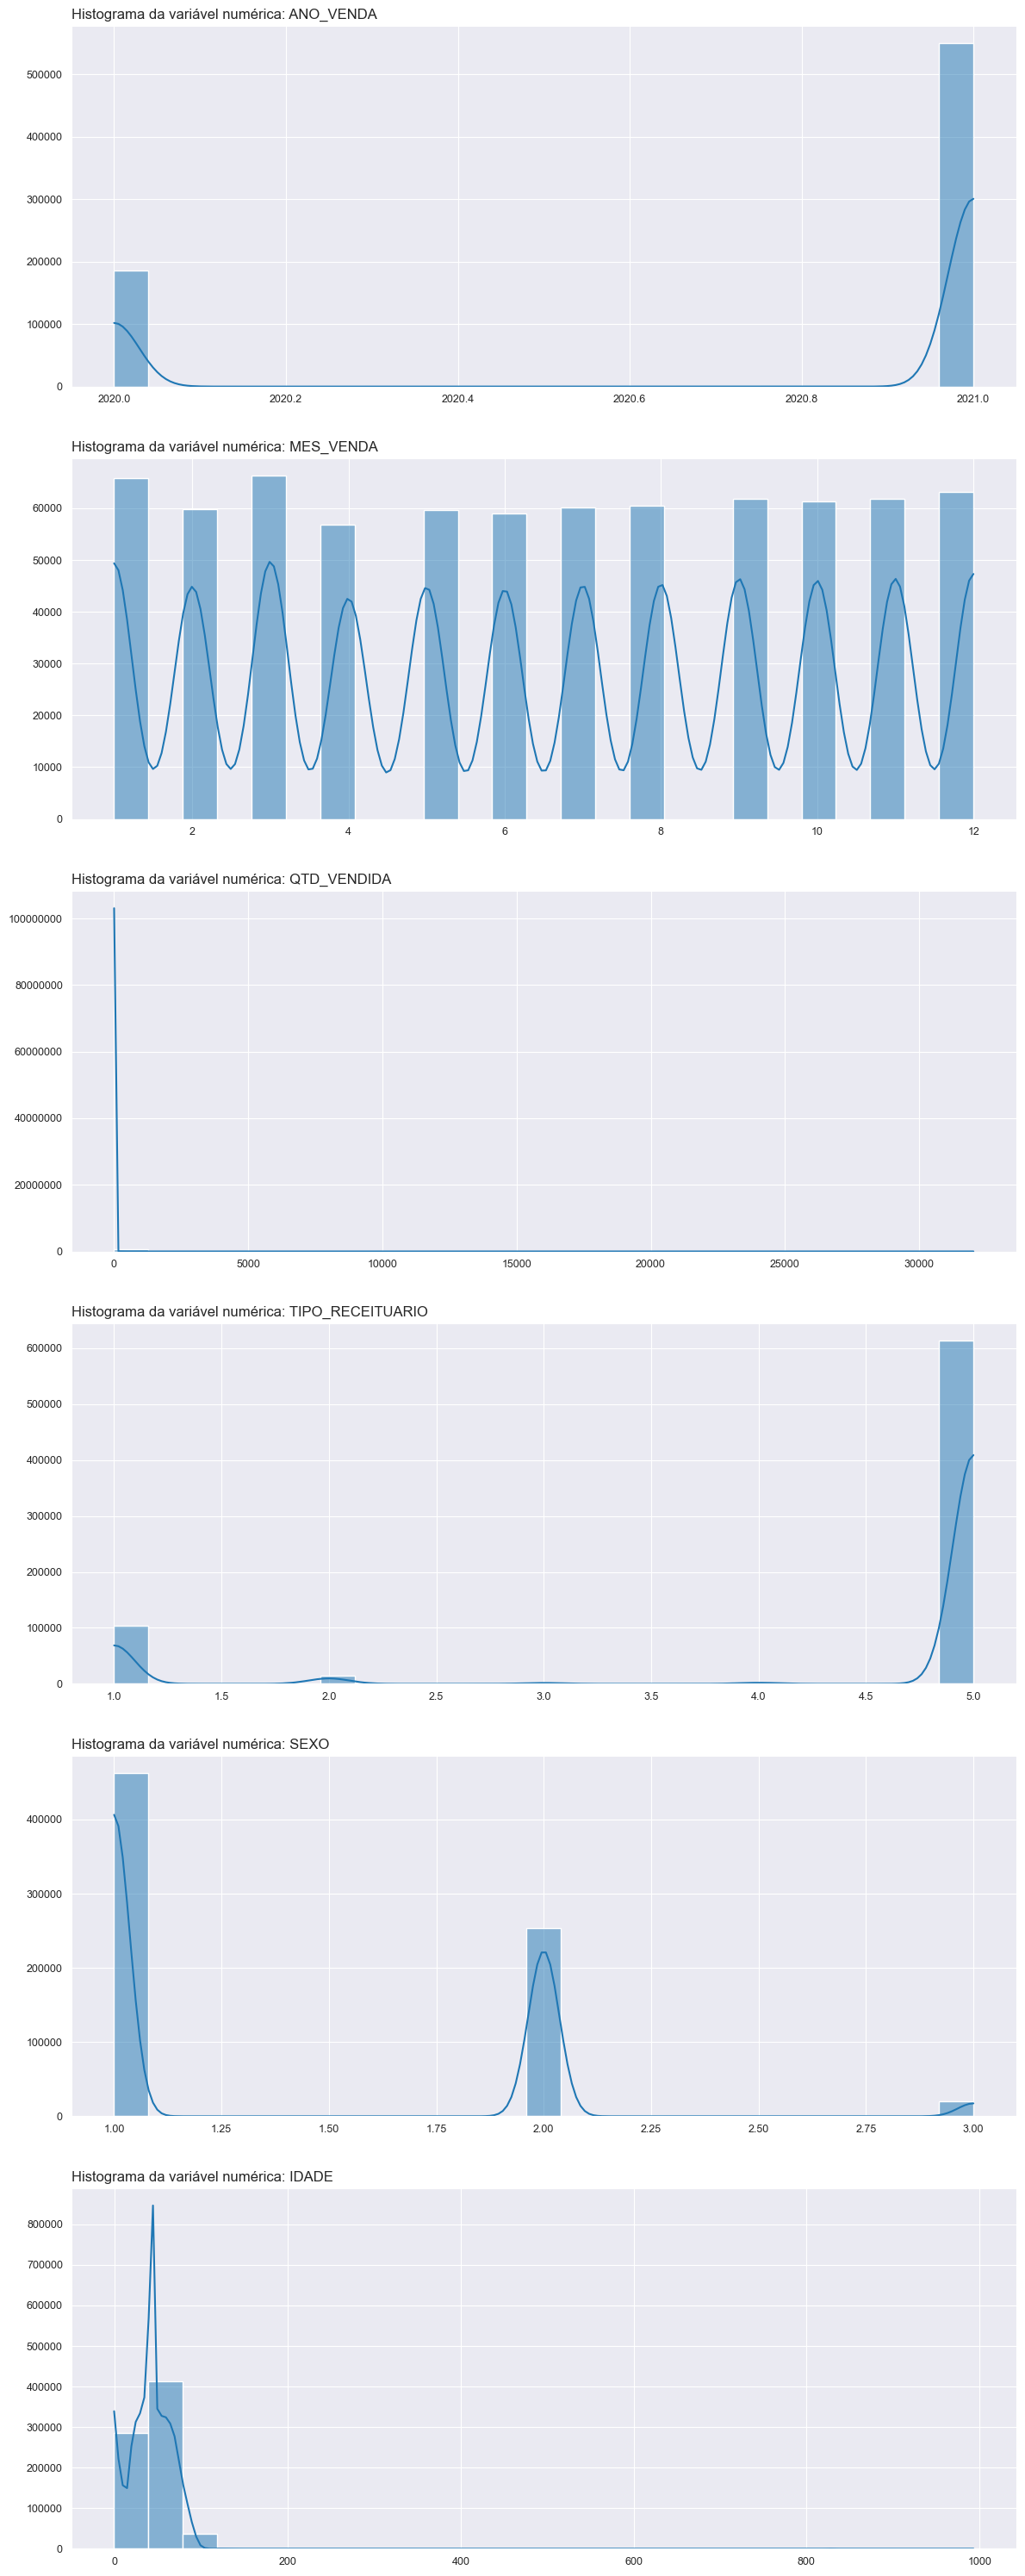

In [291]:
def graf_histplot(dataframe):
    '''
    Função para gerar gráficos histplot para variáveis numéricas do DataFrame.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    '''
    # Selecionar apenas variáveis numéricas
    colunas = dataframe.select_dtypes(include=['number']).columns

    # Calcular a quantidade de subplots necessário
    qtde_subplots = len(colunas)

    # Criar subplots dinamicamente
    fig, axs = plt.subplots(qtde_subplots, 1, figsize=(12, 5 * qtde_subplots))

    # Loop sobre as variáveis numéricas e plotar o gráfico
    for i, col in enumerate(colunas):
        sns.histplot(data=dataframe, x=col,
                     ax=axs[i], multiple='dodge', label=col, bins=25, kde=True)

        # Configurar o título e remover os rótulos dos eixos
        axs[i].set_title(f'Histograma da variável numérica: {col}', loc='left')
        axs[i].set(xlabel='', ylabel='')
        # Ajustar o tamanho dos rótulos
        axs[i].tick_params(labelsize=9)
        # Exibir rótulos sem formatação especial
        axs[i].ticklabel_format(style='plain', axis='y')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    plt.show()


graf_histplot(df)

### 5.4. Distribuição dos dados em gráfico de barras

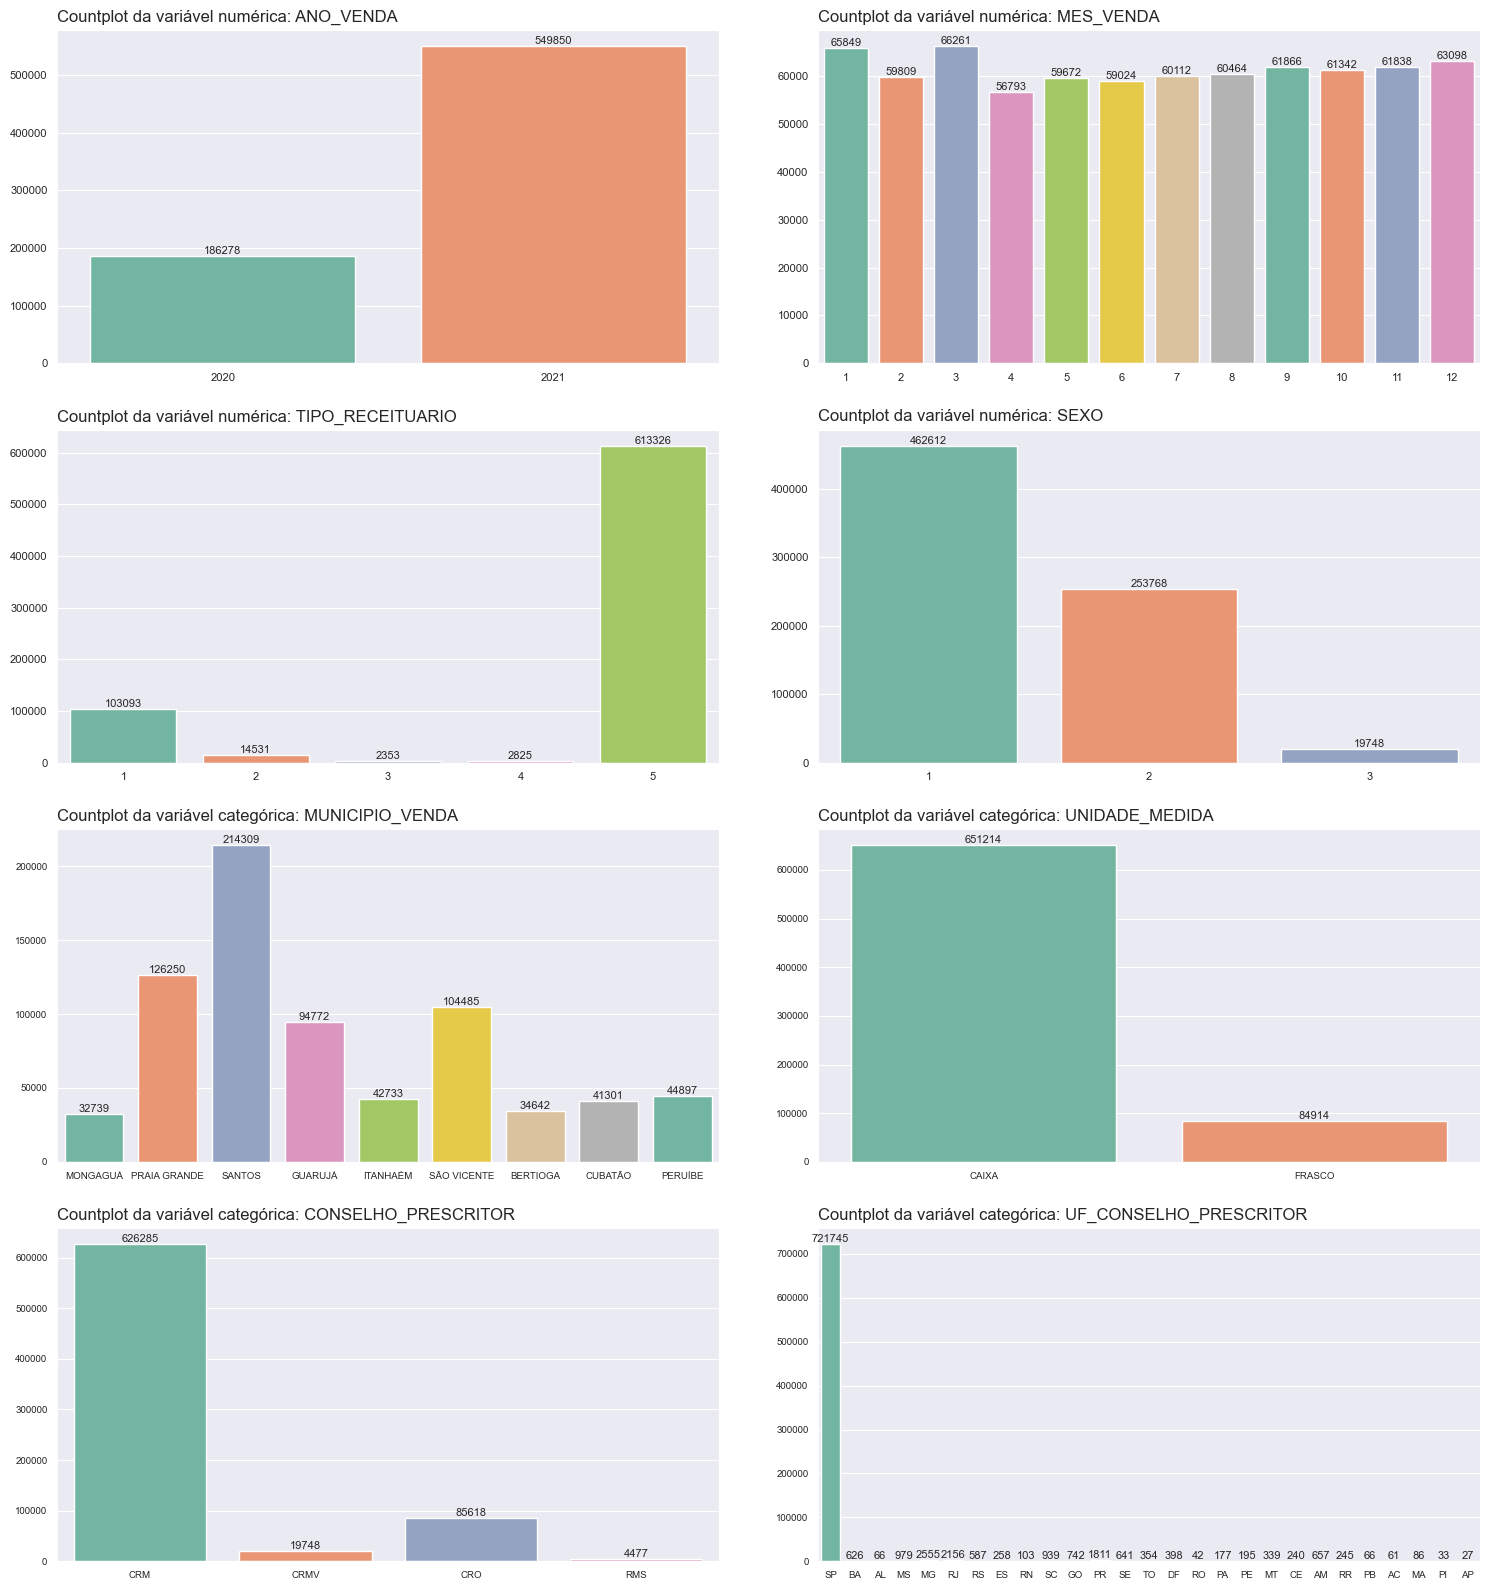

In [292]:
def graf_countplot(dataframe, cardinalidade_limite=50, ncols=2):
    '''
    Função para gerar gráficos de barras (countplot e barplot) para variáveis numéricas e categóricas do DataFrame.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    :param cardinalidade_limite: int, optional
        Limite de cardinalidade para considerar uma variável como categórica.
    :param ncols: int, optional
        Número de colunas para dispor os subplots.        
    '''
    # Separar variáveis numéricas e categóricas
    colunas_numericas = dataframe.select_dtypes(include=['number']).columns
    colunas_categoricas = dataframe.select_dtypes(exclude=['number','datetime']).columns

    # Filtrar apenas as variáveis categóricas com cardinalidade abaixo ou igual ao limite
    colunas_numericas_filtradas = [col for col in colunas_numericas if 1 < len(
        dataframe[col].unique()) <= cardinalidade_limite]
    colunas_categoricas_filtradas = [col for col in colunas_categoricas if 1 < len(
        dataframe[col].unique()) <= cardinalidade_limite]

    # Calcular a quantidade de subplots necessário
    qtde_subplots = len(colunas_numericas_filtradas) + \
        len(colunas_categoricas_filtradas)

    # Calcular o número de linhas
    nrows = (qtde_subplots + ncols - 1) // ncols

    # Criar subplots dinamicamente com layout ajustado
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 2 * qtde_subplots))

    # Achatar a lista de subplots se for bidimensional
    axs = axs.flatten() if nrows > 1 else [axs]

    # Remover subplots não utilizados
    for i in range(qtde_subplots, nrows * ncols):
        fig.delaxes(axs[i])

    # Loop sobre as variáveis numéricas filtradas e plotar o gráfico
    for i, col in enumerate(colunas_numericas_filtradas):
        # Plotar gráficos apenas para variáveis numéricas
        axs[i] = sns.countplot(data=dataframe, x=col, ax=axs[i], palette='Set2')
        axs[i].set_title(f'Countplot da variável numérica: {col}', loc='left')
        axs[i].set(xlabel='', ylabel='')
        axs[i].tick_params(labelsize=8)
        axs[i].ticklabel_format(style='plain', axis='y')
        
        # Adicionar rótulos (valores) nas barras
        for container in axs[i].containers:
            axs[i].bar_label(container, size=8)

    # Loop sobre as variáveis categóricas filtradas e plotar o gráfico
    for i, col in enumerate(colunas_categoricas_filtradas):
        axs[len(colunas_numericas_filtradas) + i] = sns.countplot(data=dataframe, x=col,
                      ax=axs[len(colunas_numericas_filtradas) + i], palette='Set2')
        axs[len(colunas_numericas_filtradas) +
            i].set_title(f'Countplot da variável categórica: {col}', loc='left')
        axs[len(colunas_numericas_filtradas) + i].set(xlabel='', ylabel='')
        axs[len(colunas_numericas_filtradas) + i].tick_params(labelsize=7)

        # Adicionar rótulos (valores) nas barras
        for container in axs[len(colunas_numericas_filtradas) + i].containers:
            axs[len(colunas_numericas_filtradas) + i].bar_label(container, size=8)

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.15, hspace=0.2)
    plt.show()


graf_countplot(df)

## 6. Análise exploratória dos dados

### 6.1. Construção de perfil de pacientes

* #### Qual é a faixa etária média dos pacientes que compram medicamentos controlados?

In [293]:
# Agrupar idades numéricas em faixas etárias
'''
    Recém-nascidos e lactentes: 0 a 1 ano
    Crianças pequenas: 1 a 5 anos
    Crianças em idade escolar: 6 a 12 anos
    Adolescentes: 13 a 17 anos
    Adultos jovens: 18 a 24 anos
    Adultos de meia-idade: 25 a 44 anos
    Adultos de idade avançada: 45 a 64 anos
    Idosos: 65 anos ou mais
'''
# Vet - medicação para uso (não exclusivo) veterinário
# 00_00 - até 11 meses
# 01_05 - de 01 a 05 anos
# 06_12 - de 06 a 12 anos
# 13_17 - de 18 a 24 anos
# 18_24 - de 25 a 34 anos
# 25_44 - de 35 a 44 anos
# 45_64 - de 45 a 64 anos
# 65_More - maior ou igual a 65 anos

faixa = [-1, 0, 1, 6, 13, 18, 25, 45, 65, df['IDADE'].max()]
rotulos = ['Veterinário',
           '00_00',
           '01_05',
           '06_12',
           '13_17',
           '18_24',
           '25_44',
           '45_64',
           '65_Mais']

df['FAIXA_ETARIA'] = pd.cut(df['IDADE'], bins=faixa,
                            labels=rotulos, right=False)
df = pd.DataFrame(df)
df.head()

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,DATA_PROC,DATA_REF,FAIXA_ETARIA
0,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,1,69,2024-01-09,2020-10-01,65_Mais
1,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,1,73,2024-01-09,2020-10-01,65_Mais
2,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,1,78,2024-01-09,2020-10-01,65_Mais
3,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,2,18,2024-01-09,2020-10-01,18_24
4,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,2,38,2024-01-09,2020-10-01,25_44


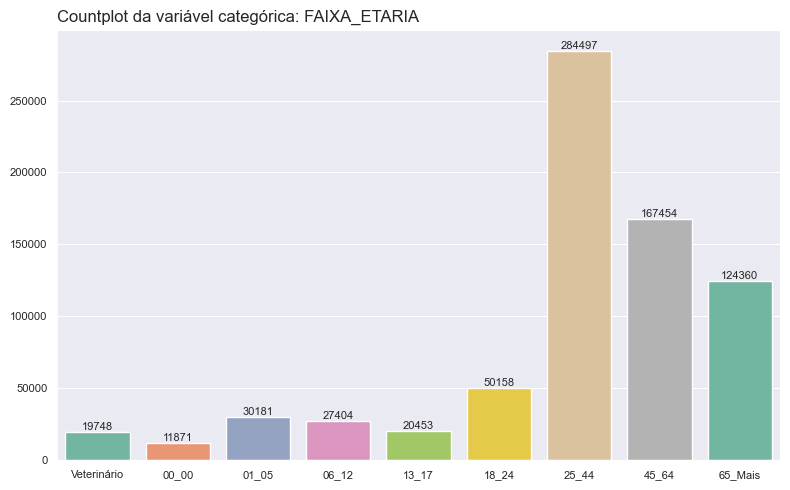

In [294]:
# Plotar gráfico
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='FAIXA_ETARIA', palette='Set2')
ax.set_title(f'Countplot da variável categórica: FAIXA_ETARIA', loc='left')
ax.set(xlabel='', ylabel='')
ax.tick_params(labelsize=8)
ax.ticklabel_format(style='plain', axis='y')
# Adicionar rótulos (valores) nas barras
for container in ax.containers:
    ax.bar_label(container, size=8)
    
# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.2)
plt.show()

In [295]:
df['FAIXA_ETARIA'].describe()

count     736126
unique         9
top        25_44
freq      284497
Name: FAIXA_ETARIA, dtype: object

In [300]:
# Realizando medidas estatísticas
print("Mínimo:", df['IDADE'].min())
print("Máximo:", df['IDADE'].max())
print("Mediana:", df['IDADE'].median())
print("Média:", df['IDADE'].mean())
print("Moda:", df['IDADE'].mode()[0])

Mínimo: -1
Máximo: 993
Mediana: 42.0
Média: 41.887944759607024
Moda: 42


In [298]:

# Mapeando rótulos para valores numéricos
mapeamento_faixa_etaria = {'00_01': 1, '02_05': 2, '06_12': 3, '13_17': 4, '18_24': 5, '25_44': 6, '45_64': 7, '65_Mais': 8}

# Criando coluna numérica correspondente
df['FAIXA_ETARIA_NUM'] = df['FAIXA_ETARIA'].map(mapeamento_faixa_etaria)

# Realizando medidas estatísticas
print("Mínimo:", df['FAIXA_ETARIA_NUM'].min())
print("Máximo:", df['FAIXA_ETARIA_NUM'].max())
print("Mediana:", df['FAIXA_ETARIA_NUM'].median())
print("Média:", df['FAIXA_ETARIA_NUM'].mean())
print("Moda:", df['FAIXA_ETARIA_NUM'].mode()[0])


Mínimo: 3.0
Máximo: 8.0
Mediana: 6.0
Média: 6.3602085638103825
Moda: 6.0


* #### Existe uma diferença significativa na idade dos pacientes com base no sexo?

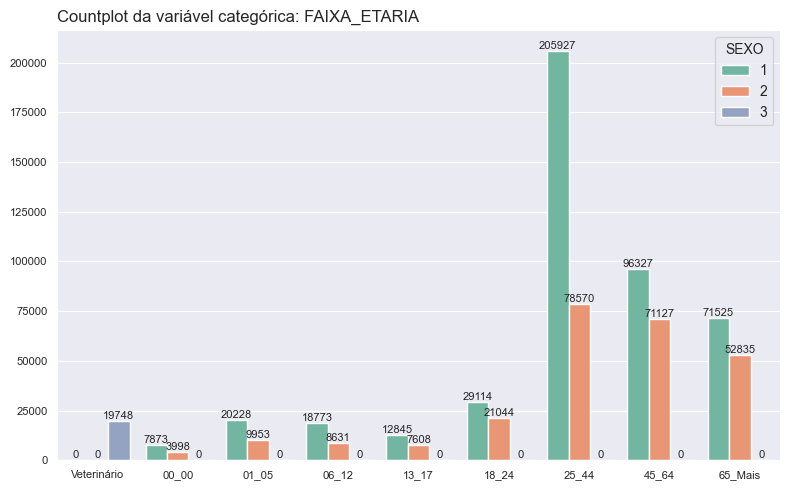

In [301]:
# Plotar gráfico
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='FAIXA_ETARIA', palette='Set2', hue='SEXO')
ax.set_title(f'Countplot da variável categórica: FAIXA_ETARIA', loc='left')
ax.set(xlabel='', ylabel='')
ax.tick_params(labelsize=8)
ax.ticklabel_format(style='plain', axis='y')
# Adicionar rótulos (valores) nas barras
for container in ax.containers:
    ax.bar_label(container, size=8)
    
# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.2)
plt.show()

* #### Quais são os tipos de receituário mais comuns entre os pacientes?

* #### Existe alguma correlação entre o tipo de receituário e a idade dos pacientes?

### 6.2. Distribuição de pacientes por município

    Qual é a idade média dos pacientes em cada município?
    Além da idade média, quais são as faixas etárias predominantes em cada município?
    Qual é em cada município dos pacientes que compram medicamentos controlados?
    Qual é a distribuição de sexo e idade dos pacientes em cada município?

### 6.3. Demanda de medicamentos por paciente

    Há uma diferença na demanda de medicamentos entre pacientes do sexo masculino e feminino?
    Existe uma diferença significativa na demanda de medicamentos entre pacientes masculinos e femininos?
    Qual é a correlação entre a idade dos pacientes e a quantidade de medicamentos vendidos?
    Como a demanda de medicamentos varia em diferentes faixas etárias ao longo do ano?
    Além da diferença de idade, existe alguma disparidade na demanda de medicamentos controlados com base no sexo e no tipo de receituário?
    Existe uma correlação entre a idade dos pacientes e o tipo de medicamento prescrito?

### 6.4. Demanda de medicamentos por município

    Quais municípios têm a maior demanda por medicamentos controlados?
    Há variações na demanda de medicamentos controlados entre diferentes os municípios?
    Existe uma sazonalidade na demanda de medicamentos em diferentes regiões?
    Qual é a demanda total de medicamentos controlados em cada município?
    Quais medicamentos têm a maior demanda em cada município?

### 6.5. Demanda de medicamentos durante o ano

    Quais são os medicamentos mais demandados?
    Como a demanda de medicamentos varia ao longo dos meses?
    Há meses com picos de vendas de medicamentos?
    Existem picos sazonais na venda de medicamentos controlados?

## 7. Conclusão